# Basic Geopandas Map

<Axes: >

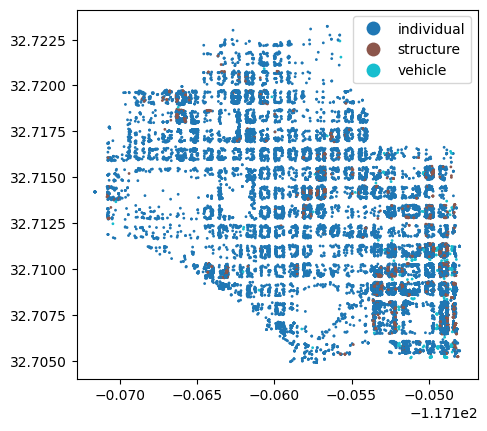

In [4]:
import geopandas as gpd

# load the data
gdf = gpd.GeoDataFrame(gpd.read_file('http://library.metatab.org/sandiegodata.org-dowtown_homeless-2.1.1/data/homeless_counts.csv'))


# Convert the geometry column from WKT to a GeoSeries, then make it a GeoDataFrame
gdf['geometry'] = gpd.GeoSeries.from_wkt(gdf['geometry'])
gdf = gpd.GeoDataFrame(gdf)

# Set the CRS to WGS84
gdf.set_crs(epsg=4326, inplace=True)

# Plot

gdf.plot(column='type', legend=True, markersize=1)

# Adding a Basemap

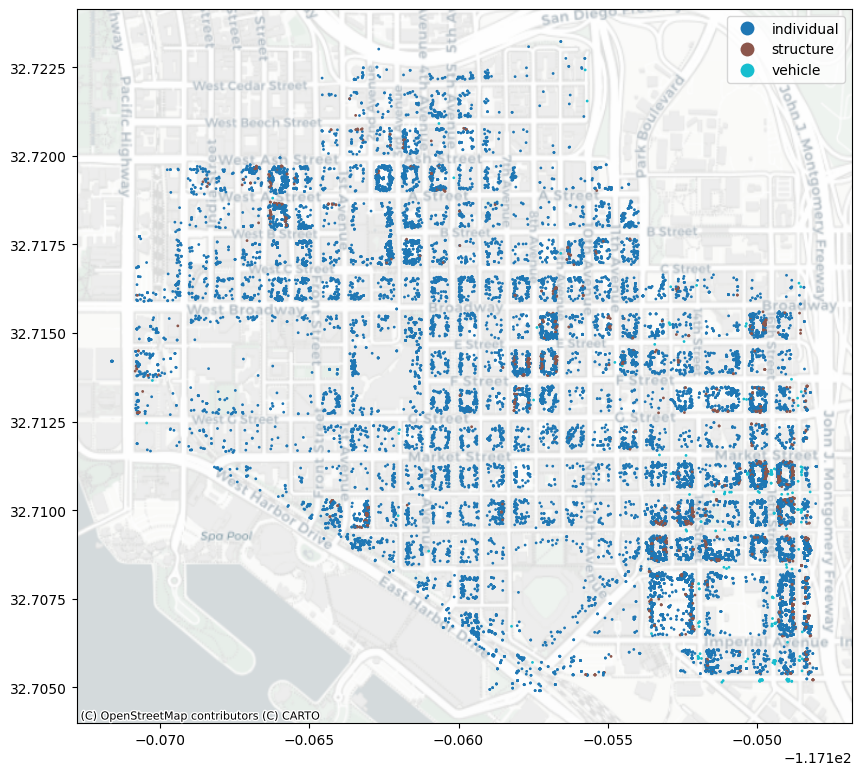

In [5]:
# NOTE! If you get the error "ModuleNotFoundError: No module named 'contextily'", 
# you need to install the contextily package. You can do this by running the following command in your terminal:
#   pip install contextily
# Then, restart and re-run the notebook.

import contextily as ctx

# Plot the GeoDataFrame
ax = gdf.plot(column='type', legend=True, markersize=1, figsize=(10, 10))

# Add basemap
ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.CartoDB.Positron)